Cluster centers:
 [[-1.63592549 -0.12279797  0.03613711  0.41576087  1.35416667  0.36503623
   0.0942029 ]
 [ 0.46429724  1.02994697 -0.6497497   0.21629416  0.56813266  0.65825523
   0.09733237]
 [ 0.53750299 -0.59804232  0.39838458  0.21831637  0.65217391  0.67622572
   0.11054579]]
Cluster labels:
 [1 0 1 ... 2 1 1]


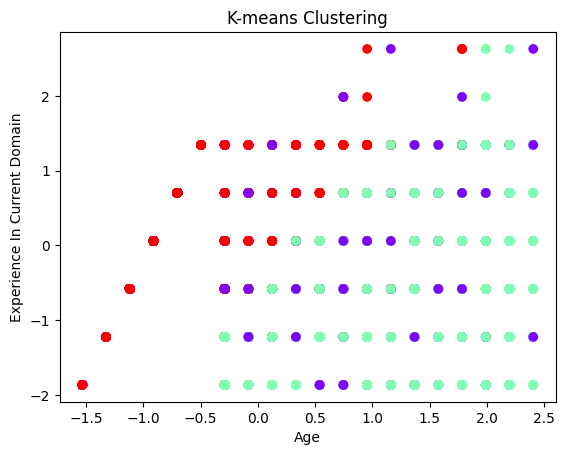

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

file_path = 'Employee.csv' 
data = pd.read_csv(file_path)

numerical_cols = ['PaymentTier', 'Age', 'ExperienceInCurrentDomain']  
categorical_cols = ['Education', 'City', 'Gender', 'EverBenched']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

data_scaled = data[numerical_cols + categorical_cols]

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_scaled)

data['Cluster'] = kmeans.labels_

print("Cluster centers:\n", kmeans.cluster_centers_)
print("Cluster labels:\n", kmeans.labels_)

plt.scatter(data['Age'], data['ExperienceInCurrentDomain'], c=kmeans.labels_, cmap='rainbow')
plt.title('K-means Clustering')
plt.xlabel('Age')
plt.ylabel('Experience In Current Domain')
plt.show()

data.to_csv('Employee_with_clusters.csv', index=False)